In [24]:
import pandas as pd

In [25]:
pip install seaborn==0.9.0

In [26]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [29]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [0 0 2 ... 2 0 2]


In [30]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.14291535  1.10657652  1.93606245  2.09956137  0.15612811
  -0.31678332 -0.20005808 -0.59813373  1.20661267 -0.09492563 -0.27683903
   0.32296436  0.30893315 -0.12690352 -0.27392134  0.15296599 -0.47067833
  -0.16938241 -0.09023326]
 [-0.05917995  0.48691254 -0.0084753  -0.23682351 -0.26744746 -0.60393501
   0.49637675 -0.2156668  -0.14819498 -0.11758544  0.24302934  0.7415492
   0.10832592 -0.17801823  0.47232318 -0.33832325  0.44699914  1.28193219
  -0.12011762 -0.06208131]
 [ 0.0369887  -0.24092483 -0.20022941 -0.25248729 -0.26912746  0.23737694
  -0.16036394  0.13191924  0.17555779 -0.1705832  -0.08960645 -0.27577412
  -0.10726817  0.0215101  -0.18476221  0.19958851 -0.22518752 -0.47819271
  

In [31]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.142915,1.106577,1.936062,2.099561,0.156128,-0.316783,-0.200058,-0.598134,1.206613,-0.094926,-0.276839,0.322964,0.308933,-0.126904,-0.273921,0.152966,-0.470678,-0.169382,-0.090233
1,-0.059180,0.486913,-0.008475,-0.236824,-0.267447,-0.603935,0.496377,-0.215667,-0.148195,-0.117585,0.243029,0.741549,0.108326,-0.178018,0.472323,-0.338323,0.446999,1.281932,-0.120118,-0.062081
2,0.036989,-0.240925,-0.200229,-0.252487,-0.269127,0.237377,-0.160364,0.131919,0.175558,-0.170583,-0.089606,-0.275774,-0.107268,0.021510,-0.184762,0.199589,-0.225188,-0.478193,0.084157,0.043991


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe8d217410>,
      dtype=object)

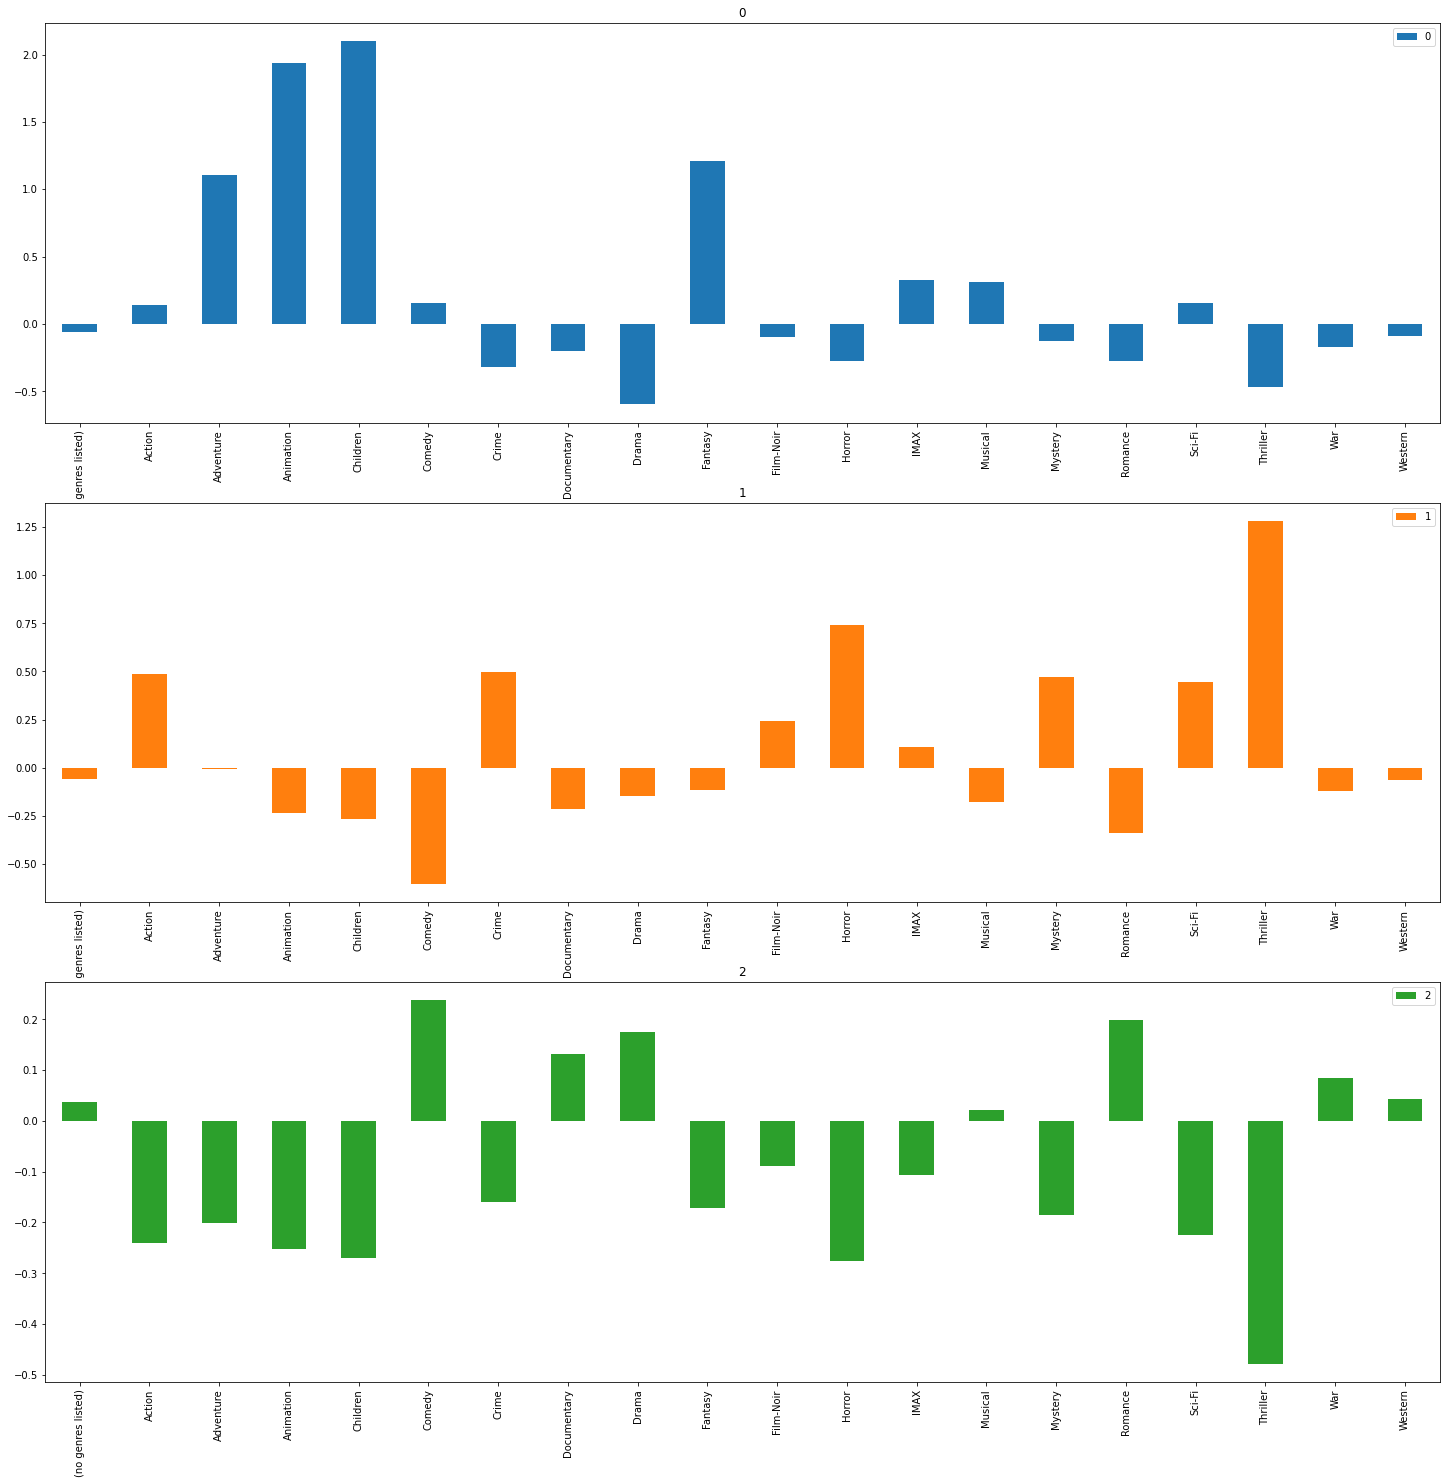

In [32]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [33]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3889,5463,Reign of Fire (2002),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6934,65088,Bedtime Stories (2008),Adventure|Children|Comedy,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8683,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
9670,182731,Pixel Perfect (2004),Children|Comedy|Sci-Fi,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1524,2056,In Search of the Castaways (1962),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5636,27368,Asterix & Obelix: Mission Cleopatra (Astérix &...,Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
973,1274,Akira (1988),Action|Adventure|Animation|Sci-Fi,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7929,95543,Ice Age 4: Continental Drift (2012),Adventure|Animation|Comedy,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8726,126921,The Fox and the Hound 2 (2006),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,3153,"7th Voyage of Sinbad, The (1958)",Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  2.456383 , -19.65847  ],
       [ 25.120493 , -24.024565 ],
       [-10.652486 ,  41.737568 ],
       ...,
       [-20.346972 ,   6.7367496],
       [ 70.369774 , -20.922169 ],
       [ 24.567575 ,  -0.6923242]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


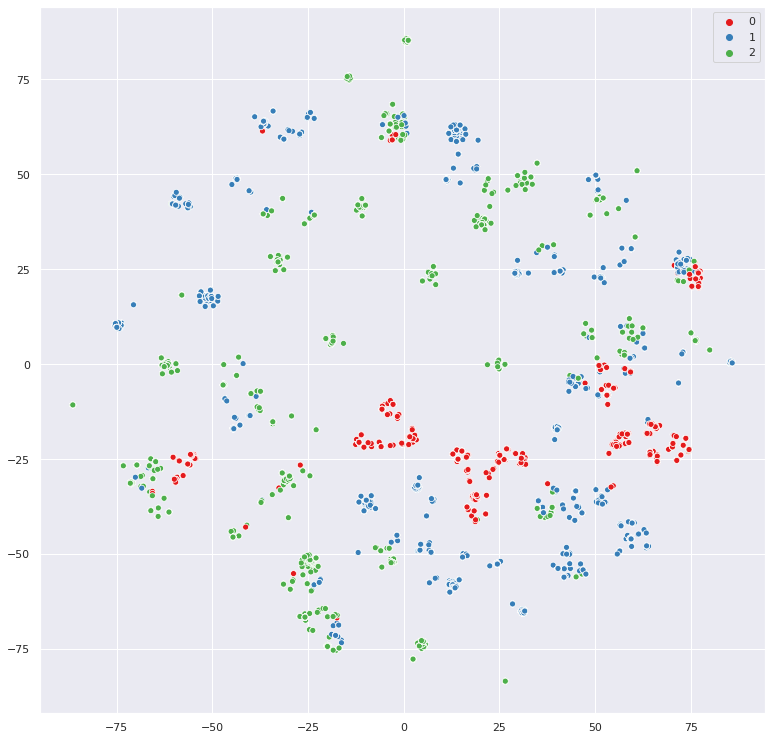

In [35]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe8cae7310>,
      dtype=object)

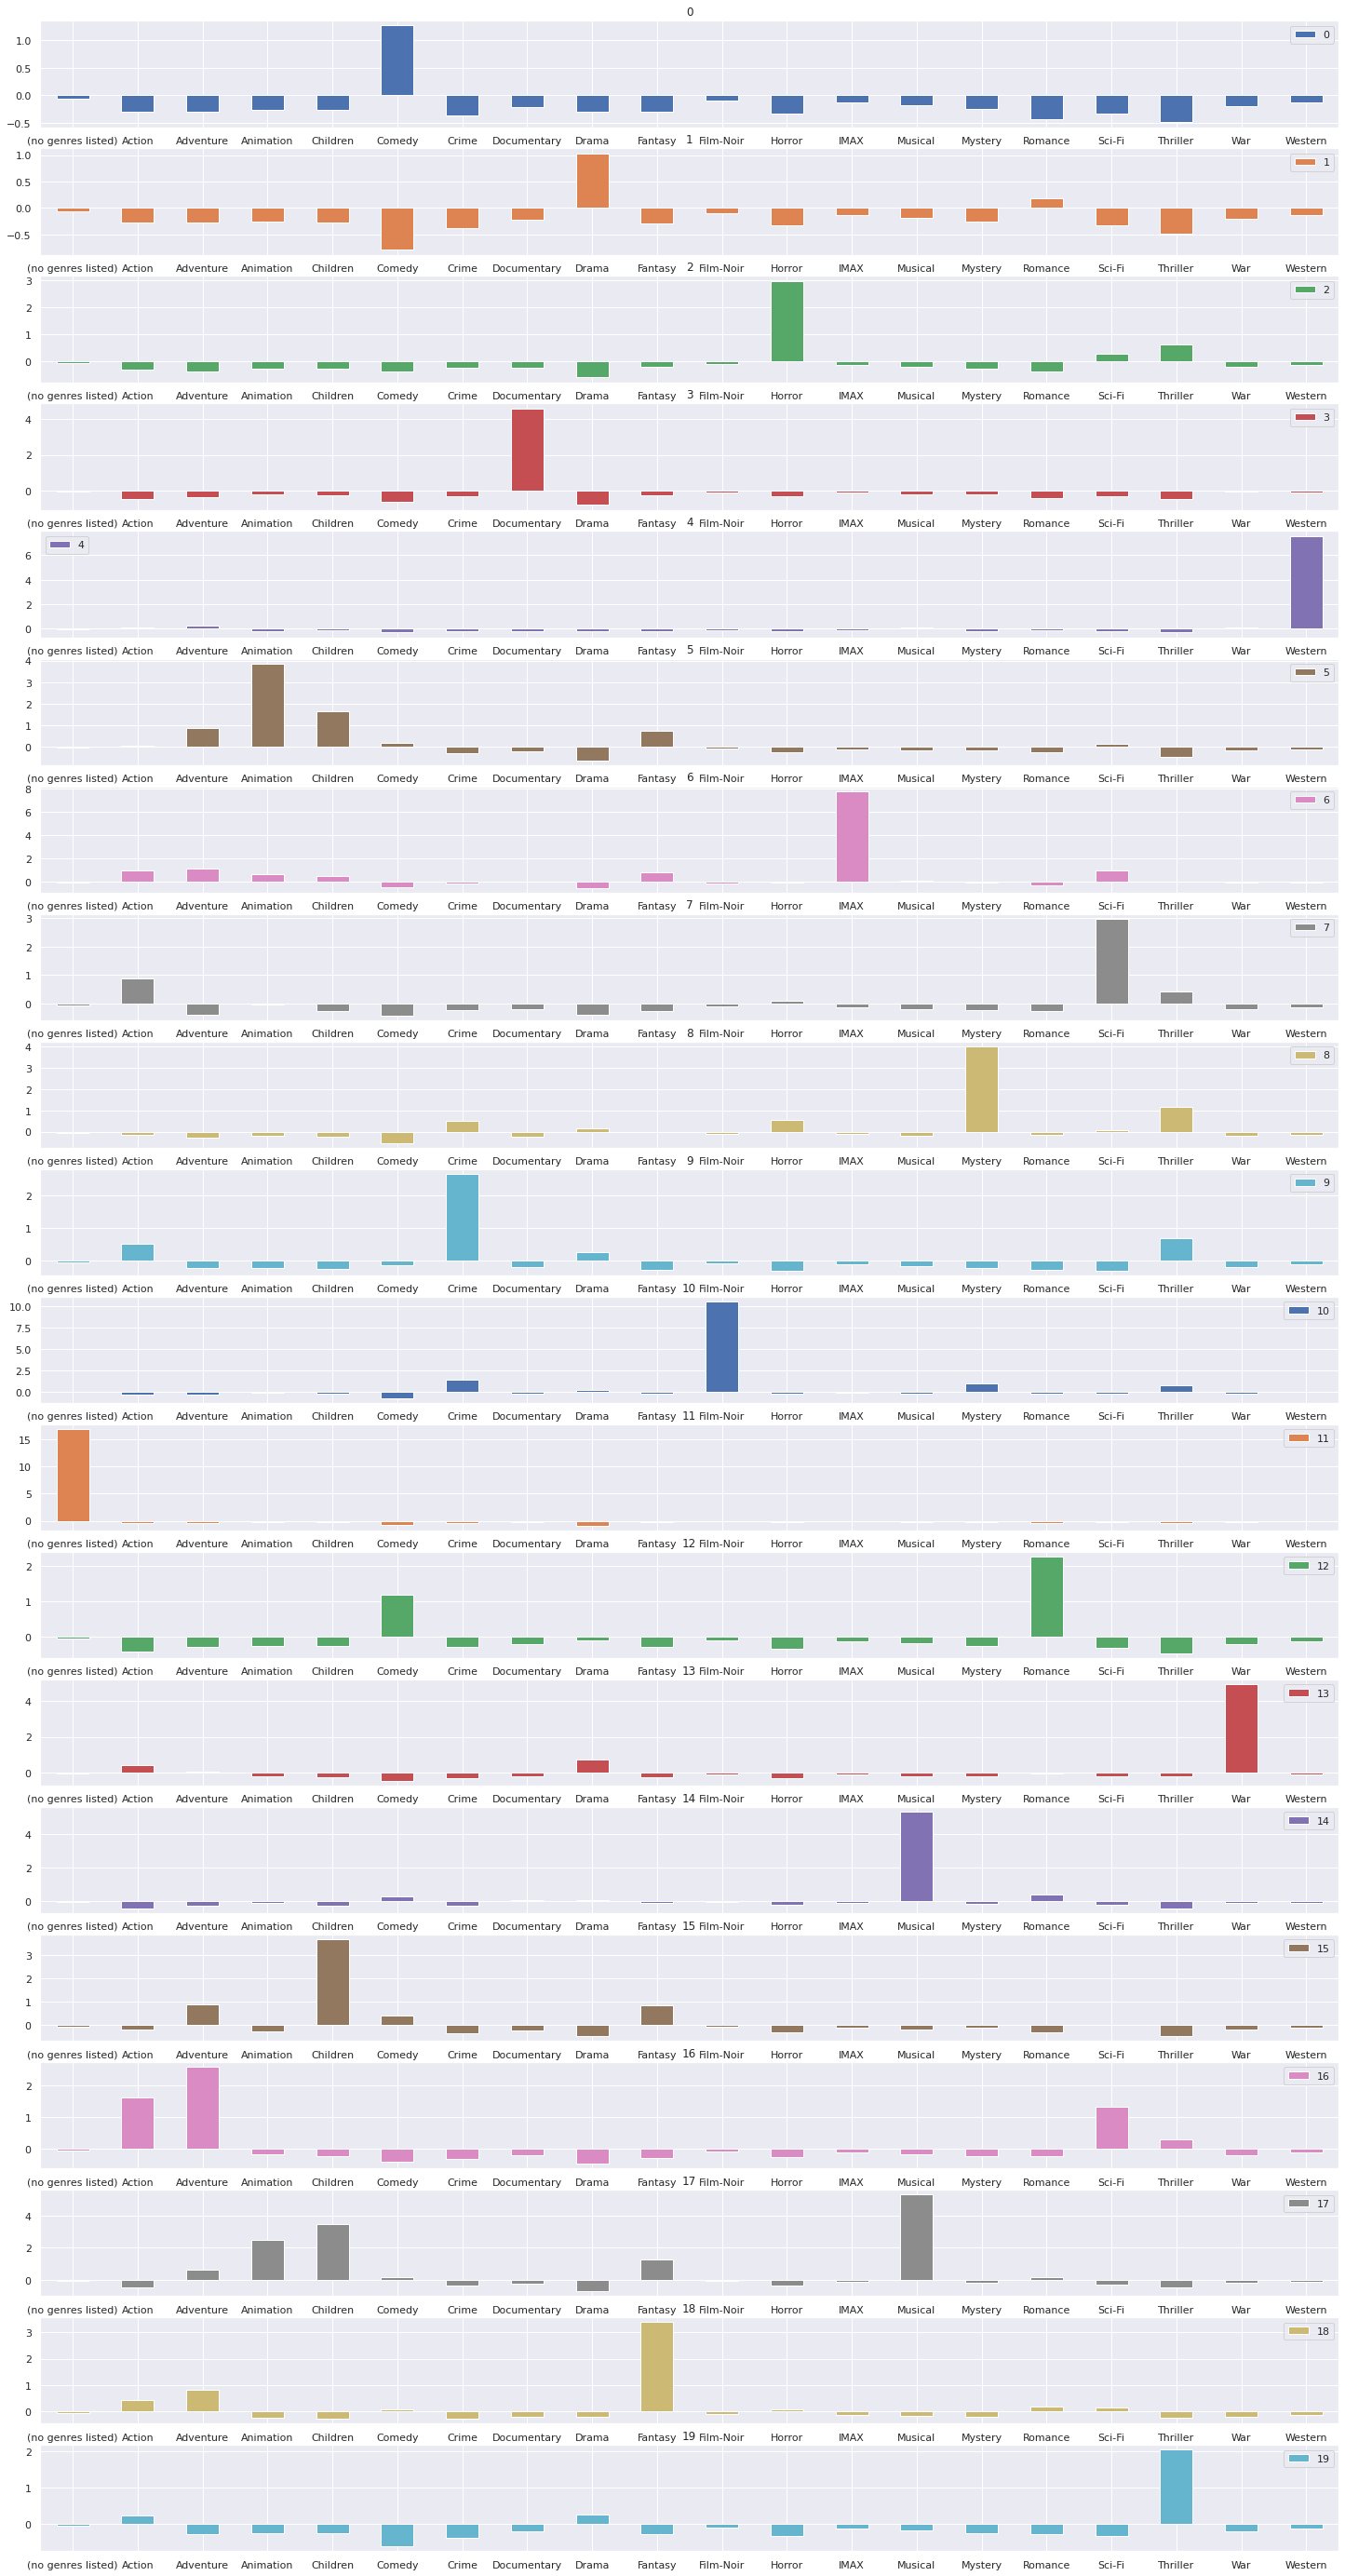

In [36]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [37]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2771,3709,Sleepwalkers (1992),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2728,3663,Puppet Master 4 (1993),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
6736,59131,Are You Scared? (2006),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5040,7845,Tremors II: Aftershocks (1996),Comedy|Horror|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2921,3917,Hellraiser (1987),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4083,5833,Dog Soldiers (2002),Action|Horror,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4942,7449,Godsend (2004),Drama|Horror|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1790,2389,Psycho (1998),Crime|Horror|Thriller,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
7723,90469,Paranormal Activity 3 (2011),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3090,4148,Hannibal (2001),Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [38]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [39]:
kmeans(20, generos_escalados)

[20, 55219.98111162806]

In [40]:
kmeans(3, generos_escalados)

[3, 166139.5947743099]

In [41]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 180502.33922140402],
 [3, 166377.11769081352],
 [4, 157366.7368748826],
 [5, 147122.96041181593],
 [6, 136494.866436311],
 [7, 128767.72582926186],
 [8, 120497.30562500042],
 [9, 111232.21689840025],
 [10, 101691.54087477842],
 [11, 92718.46047296037],
 [12, 90664.72237694153],
 [13, 79970.86842634407],
 [14, 74541.81811094357],
 [15, 72907.49075979293],
 [16, 64257.848863803316],
 [17, 60643.748467344165],
 [18, 58682.58638759502],
 [19, 57551.675783769126],
 [20, 54803.148543323055],
 [21, 53044.95387438927],
 [22, 52818.42528461468],
 [23, 50678.7961545122],
 [24, 49542.930270010256],
 [25, 47695.08776211565],
 [26, 47479.085950298926],
 [27, 45918.721561667626],
 [28, 44863.013910425936],
 [29, 43571.67285131346],
 [30, 41889.50643466162],
 [31, 41982.73555979782],
 [32, 40565.270027276565],
 [33, 39570.33747260549],
 [34, 39421.8174654941],
 [35, 38890.5051036934],
 [36, 37985.48808452258],
 [37, 37339.024754293336],
 [38, 36224.50628167565],
 [39, 36529.42161

In [42]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,180502.339221
2,3,166377.117691
3,4,157366.736875
4,5,147122.960412
5,6,136494.866436
6,7,128767.725829
7,8,120497.305625
8,9,111232.216898
9,10,101691.540875


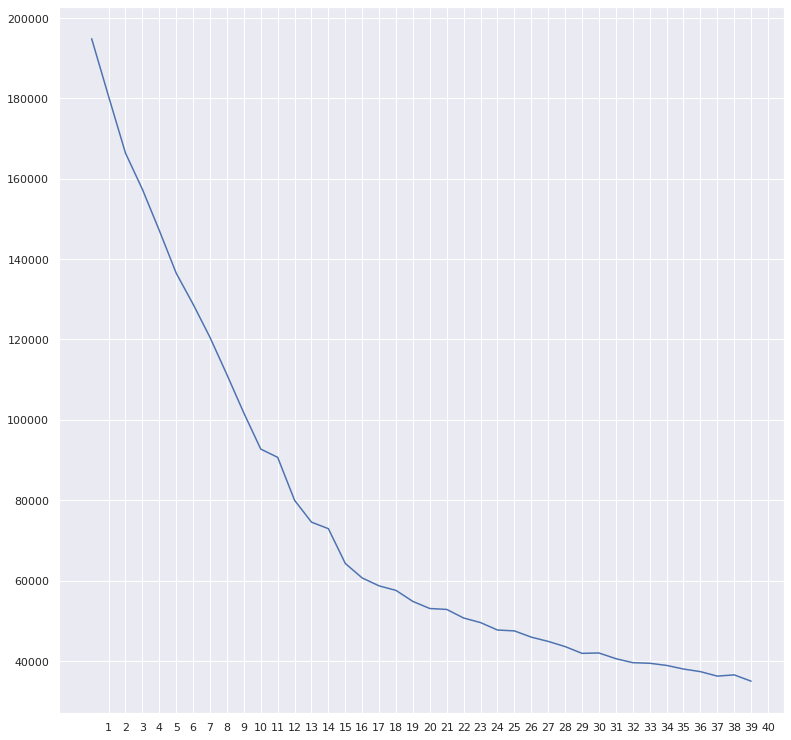

In [43]:
resultado.inertia.plot(xticks=resultado.grupos)

###Escolhendo o melhor cluster, conforme a mudança da curva, assim que ela se torna mais suavizada é o ponto ideal para o cluster. No caso é entre 15 à 18.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe8b4fc6d0>,
      dtype=object)

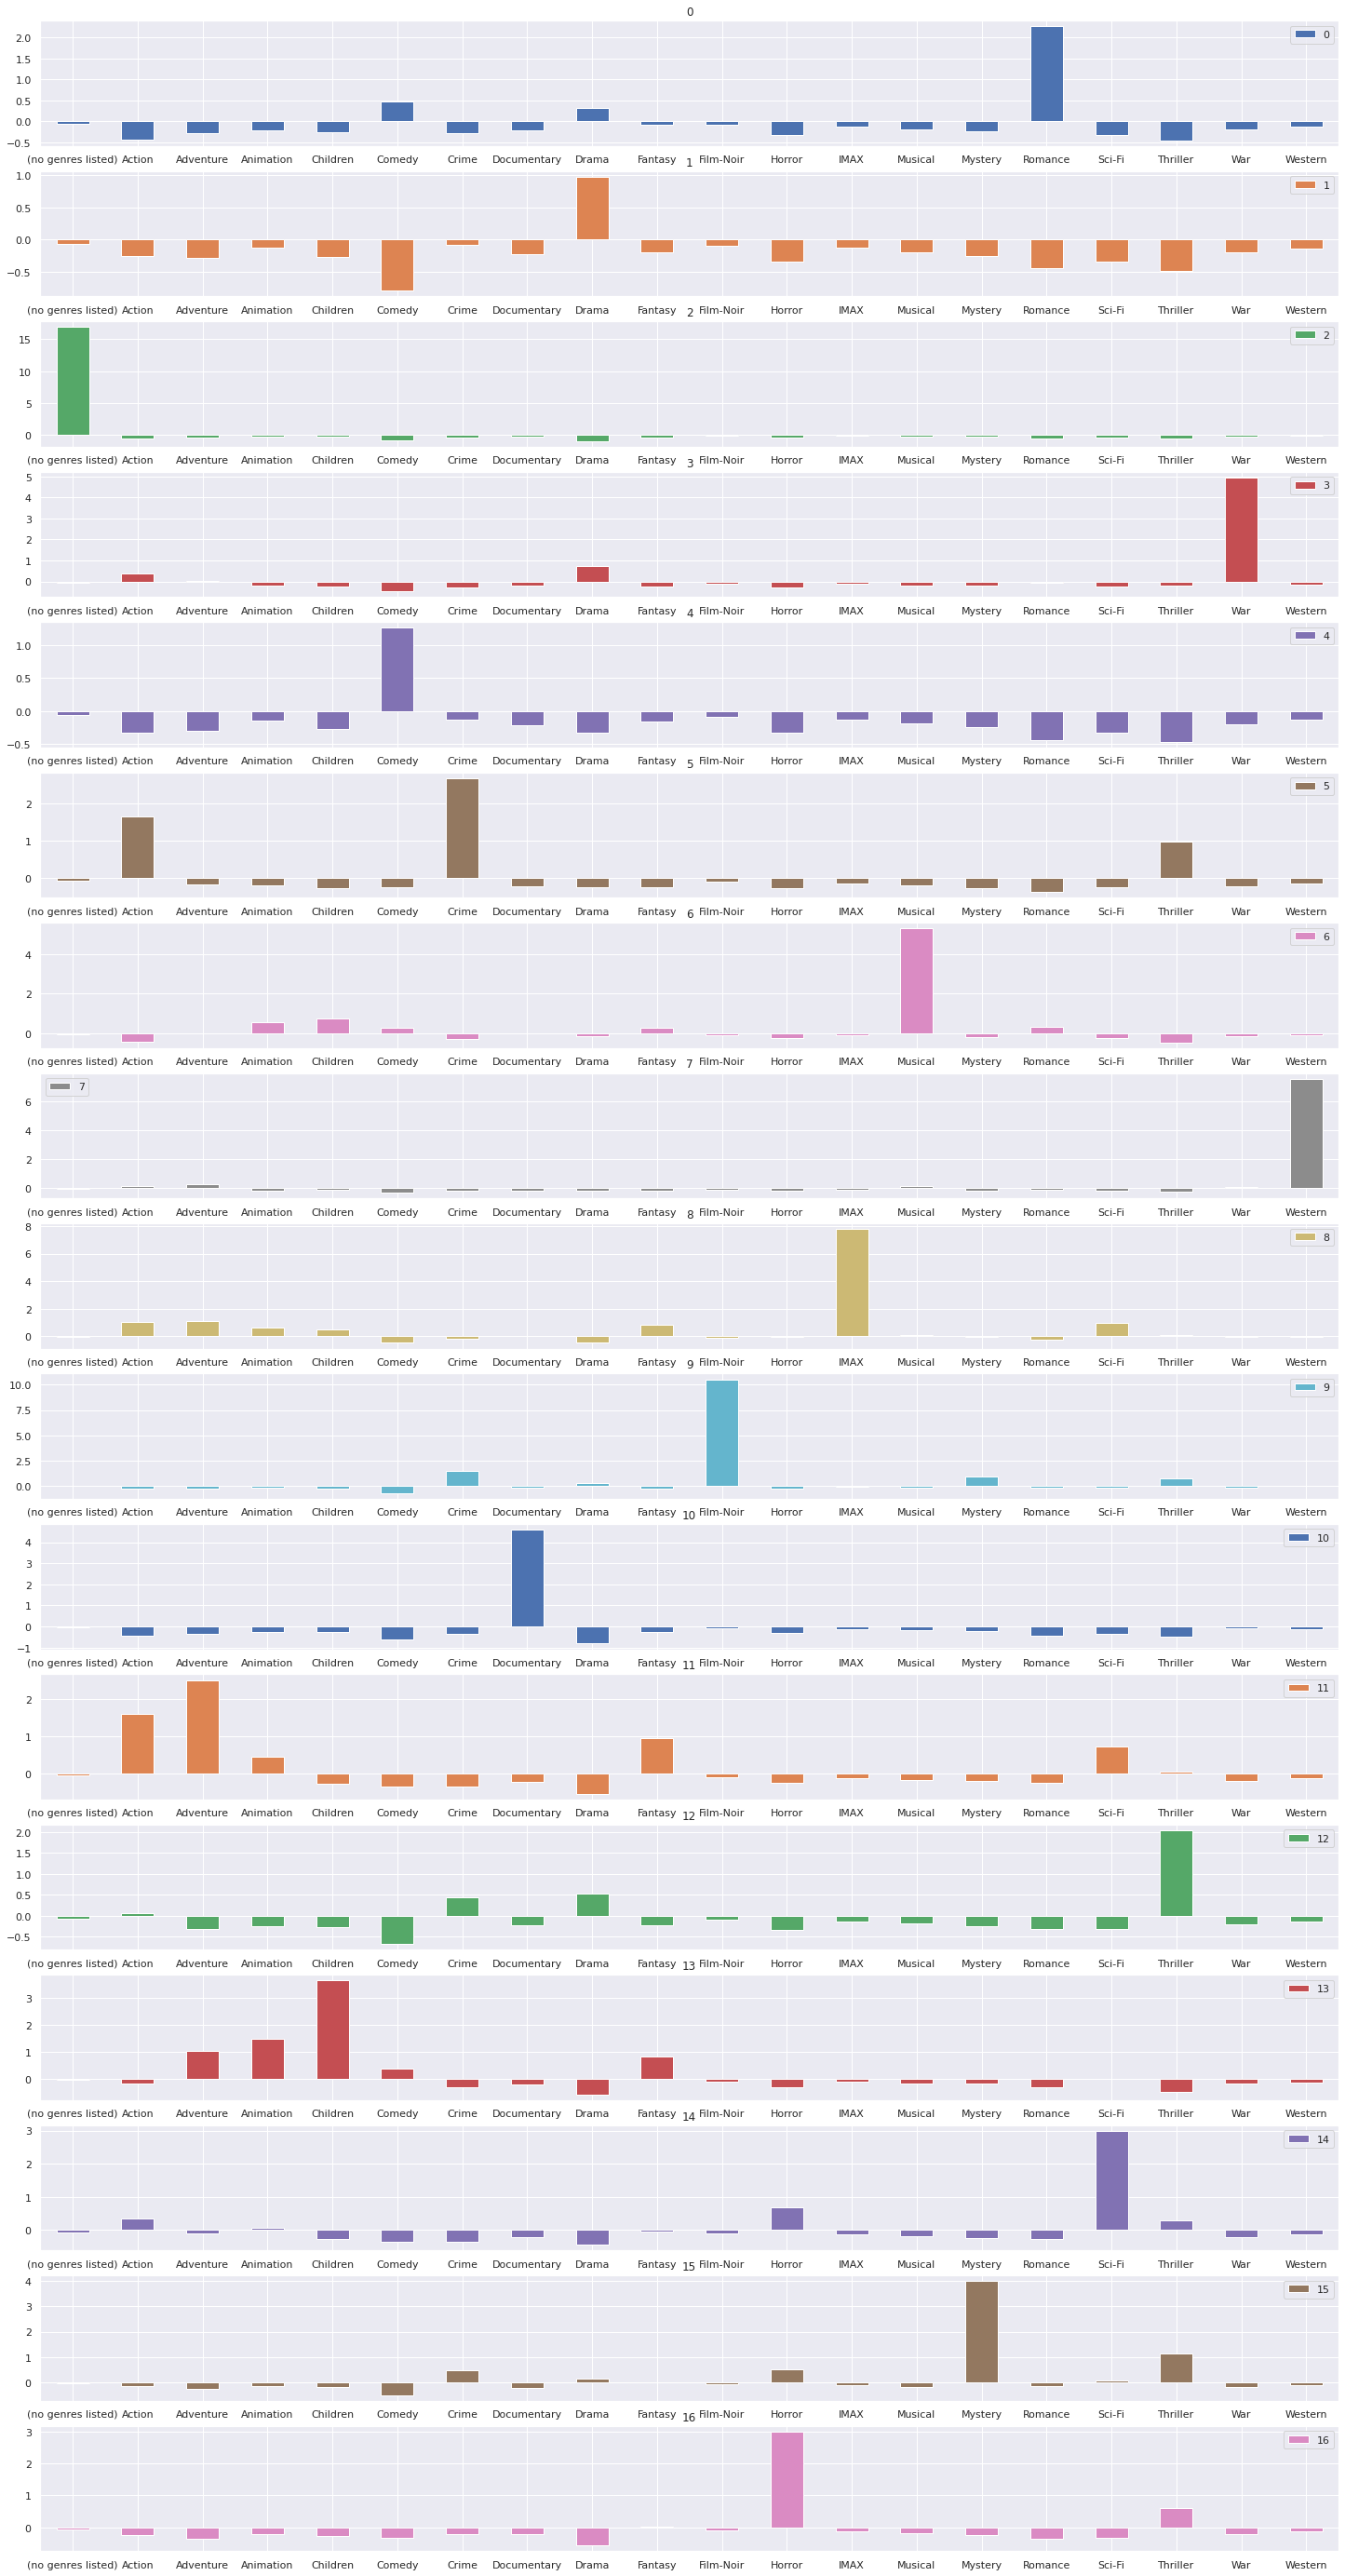

In [44]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [45]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1019,1330,April Fool's Day (1986),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7205,72731,"Lovely Bones, The (2009)",Crime|Drama|Fantasy|Horror|Thriller,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0
7149,71494,"Haunted World of El Superbeasto, The (2009)",Action|Animation|Comedy|Horror|Thriller,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
597,742,Thinner (1996),Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7804,92309,"Innkeepers, The (2011)",Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5884,33164,House of Wax (2005),Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1471,1996,Poltergeist III (1988),Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4705,7022,Battle Royale (Batoru rowaiaru) (2000),Action|Drama|Horror|Thriller,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
5890,33294,Vampire Hunter D (1985),Animation|Fantasy|Horror,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
81,92,Mary Reilly (1996),Drama|Horror|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [46]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=17)

grupos = modelo.fit_predict(generos_escalados)

grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [47]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 24.762    , -65.181046 ],
       [ 61.69474  ,  -0.9672158],
       [-33.605404 , -21.828316 ],
       ...,
       [-16.454449 ,   4.8941183],
       [  2.6308527, -62.84205  ],
       [ 21.542292 ,   2.3386784]], dtype=float32)

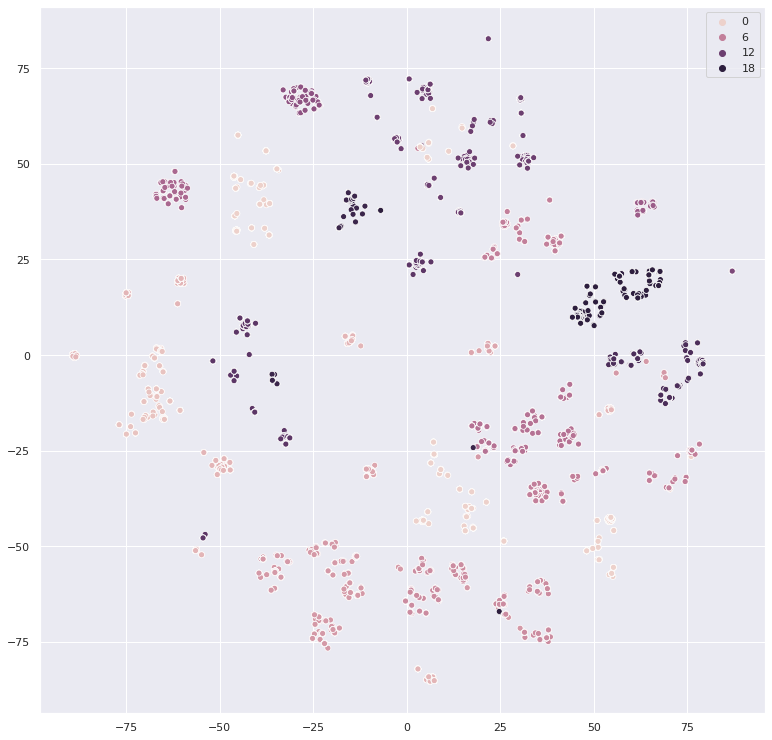

In [48]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe8a83e5d0>,
      dtype=object)

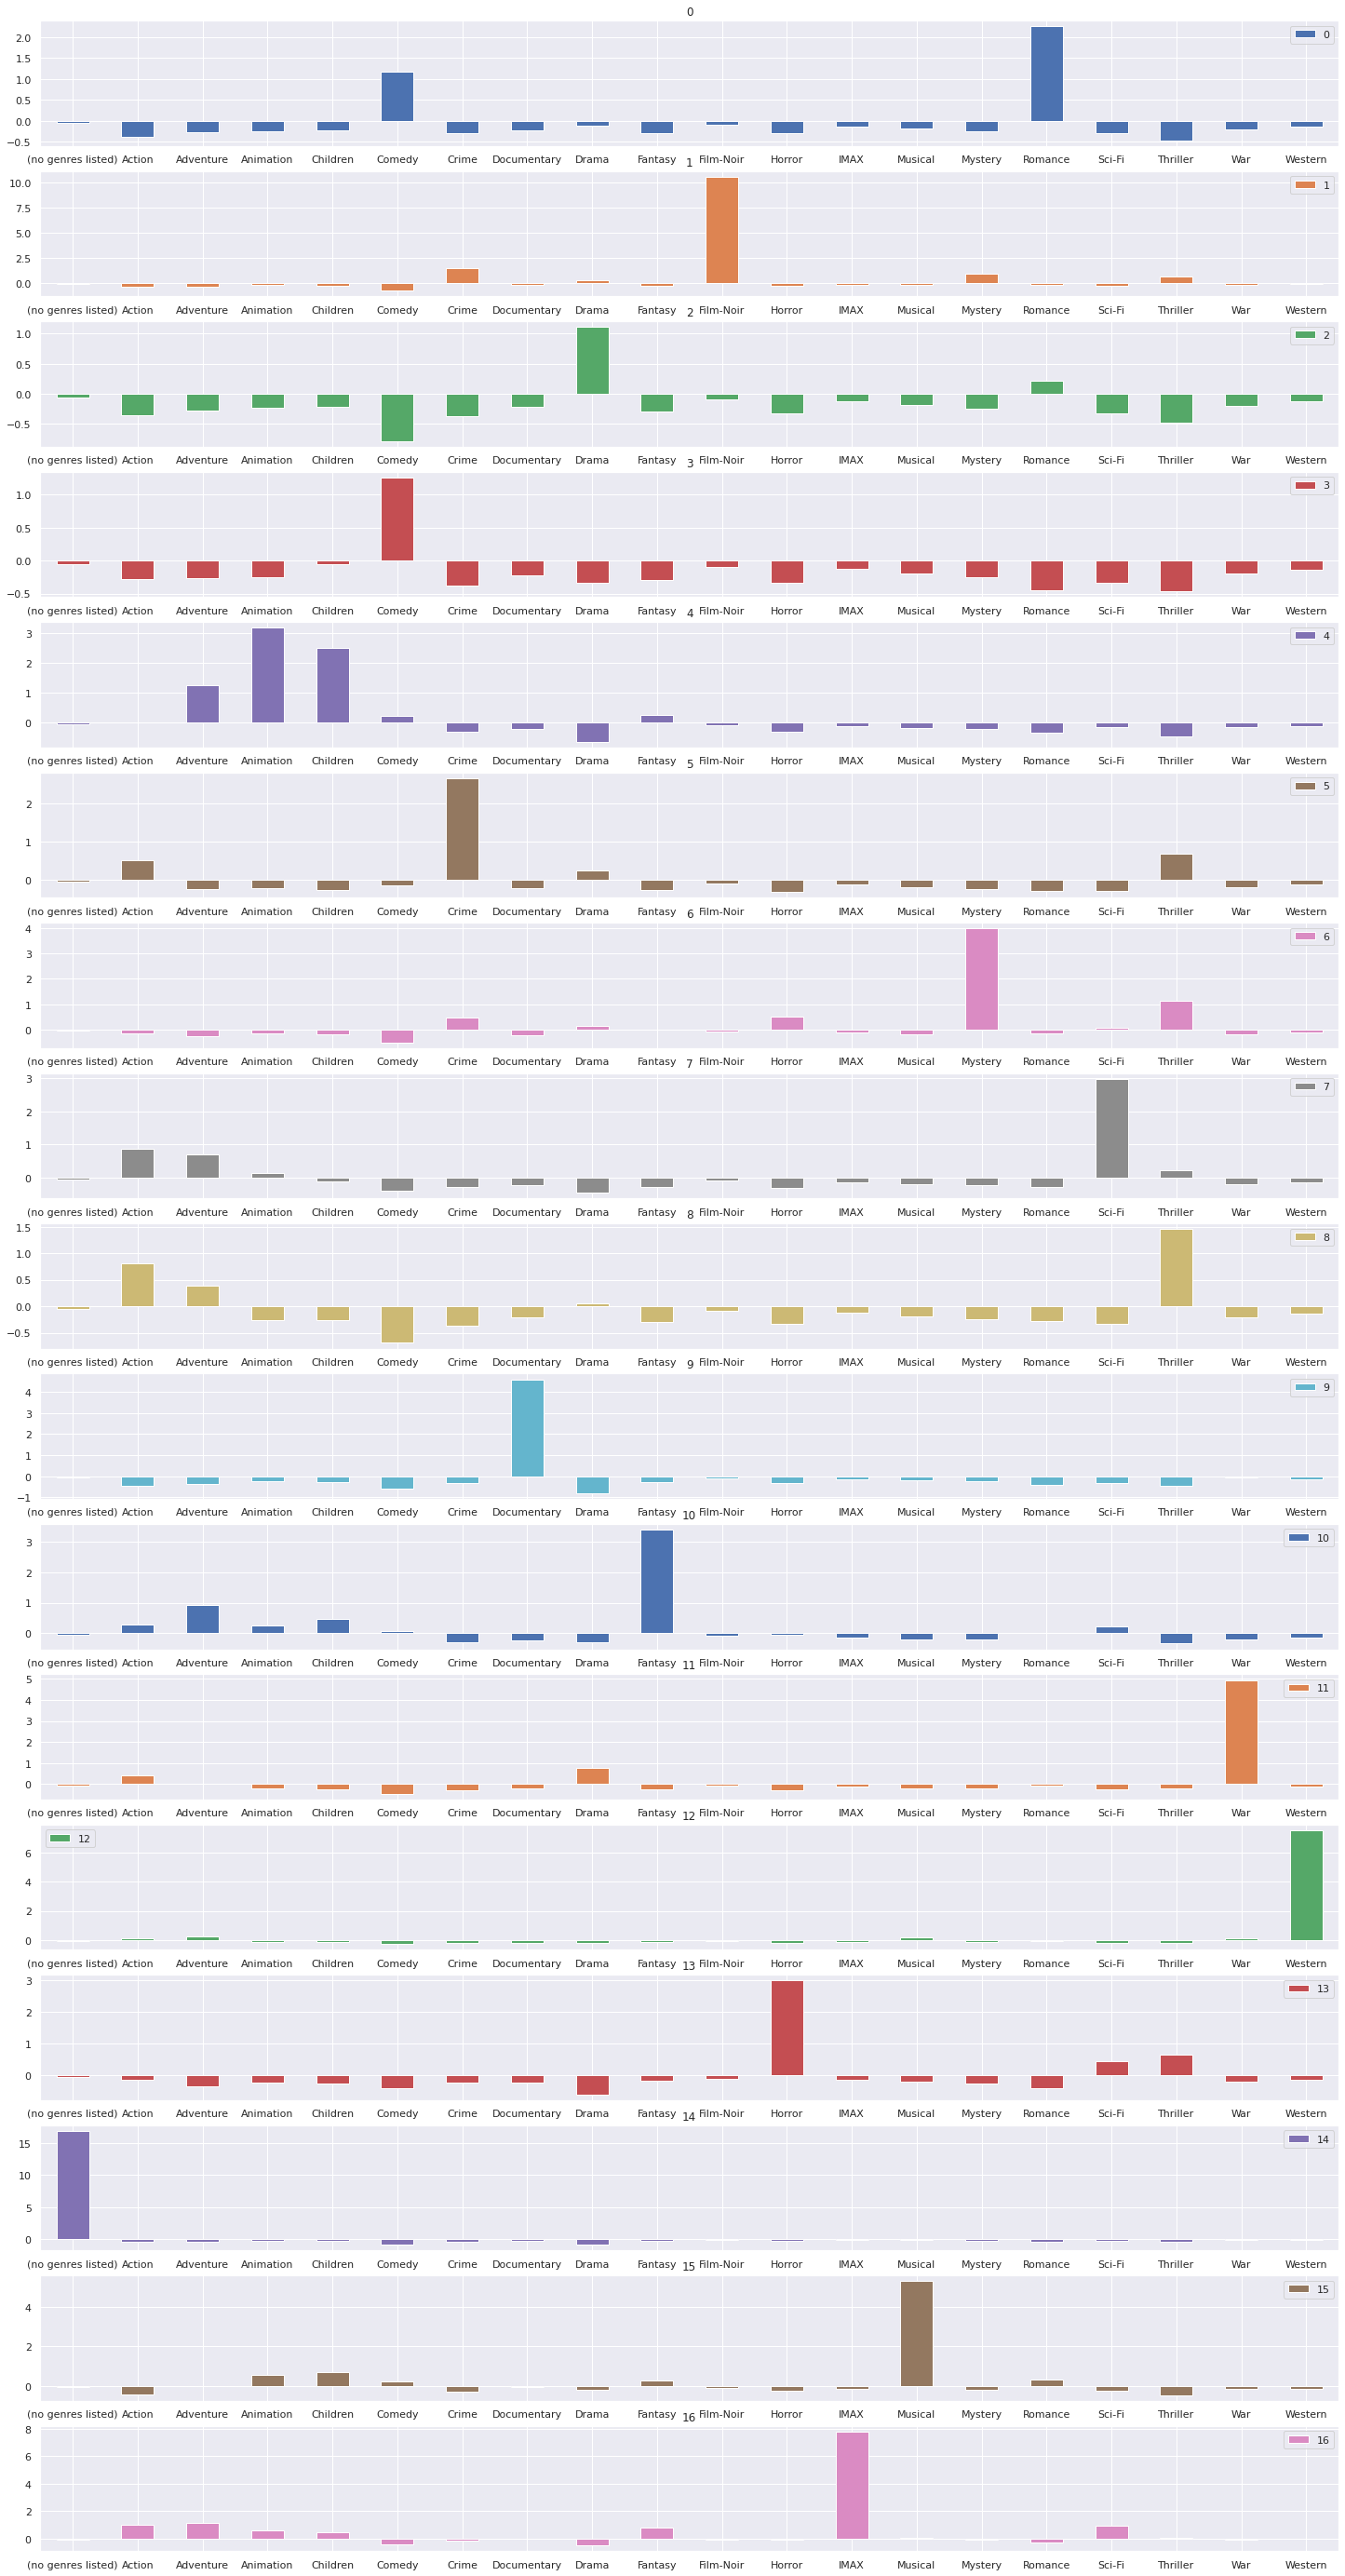

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [50]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        ,  3.        ,  2.60093429,  2.        ],
       [ 8.        , 17.        ,  2.63820804,  3.        ],
       [ 0.        , 18.        ,  2.72070839,  4.        ],
       [ 5.        , 19.        ,  3.26616754,  5.        ],
       [ 7.        , 20.        ,  3.63286624,  6.        ],
       [13.        , 21.        ,  3.77907649,  7.        ],
       [10.        , 22.        ,  4.22862135,  8.        ],
       [ 6.        , 23.        ,  4.60446689,  9.        ],
       [ 4.        , 24.        ,  4.69795748, 10.        ],
       [ 9.        , 25.        ,  5.19518881, 11.        ],
       [11.        , 26.        ,  5.25876577, 12.        ],
       [15.        , 27.        ,  5.793499  , 13.        ],
       [12.        , 28.        ,  7.89280693, 14.        ],
       [16.        , 29.        ,  8.3088394 , 15.        ],
       [ 1.        , 30.        , 10.815665  , 16.        ],
       [14.        , 31.        , 17.0889818 , 17.        ]])

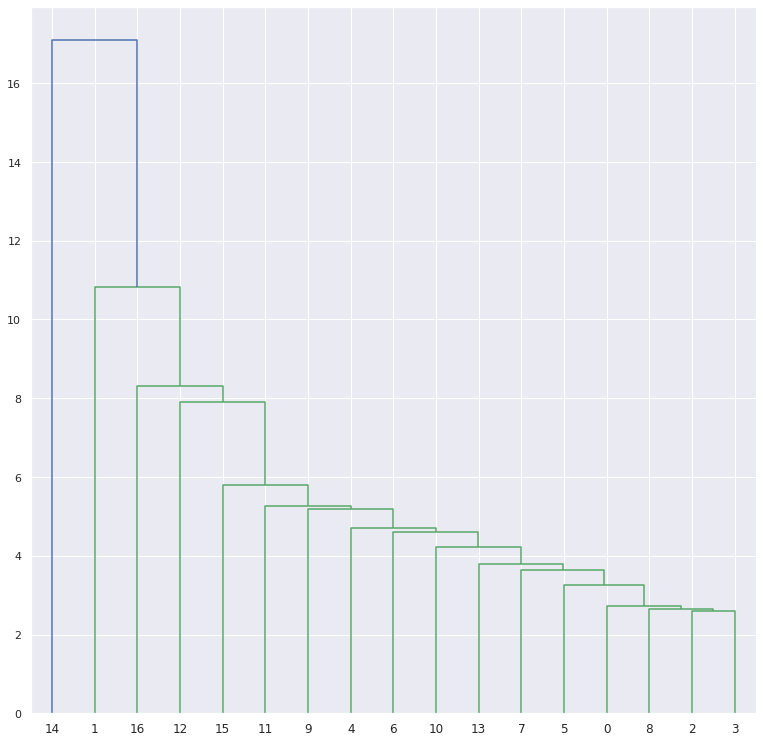

In [51]:
dendrograma = dendrogram(matriz_de_distancia)